In [14]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score
import seaborn as sns

In [2]:
# Load train and test CSV files
train_data = pd.read_csv(r'F:\Kabir\CSUN\R\training_data_final.csv')
test_data = pd.read_csv(r'F:\Kabir\CSUN\R\testing_data_final.csv')

In [3]:
train_data.head(2)

,sentiment_class,aake,aapki,aapse,abhorrent,ability,abject,able,abomination,abrasive,...,zoo,zoom,zoomedin,zoomers,zooming,zz,zürich,äckligt,åt,punctuation_percent
0,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.26
1,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [4]:
# Define your class mapping
class_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Extract features (TF-IDF vectors) and labels from train data
X_train = train_data.drop(columns=['sentiment_class'])
y_train = train_data['sentiment_class'].map(class_mapping)

# Extract features (TF-IDF vectors) and labels from test data
X_test = test_data.drop(columns=['sentiment_class'])
y_test = test_data['sentiment_class'].map(class_mapping)

In [6]:
start_time = time.time()
# Initialize CatBoost classifier
catboost = CatBoostClassifier()

# Define parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

# Define custom scorer (accuracy) for GridSearchCV
custom_scorer = make_scorer(accuracy_score)

# Perform GridSearchCV
grid_search = GridSearchCV(catboost, param_grid, cv=3, scoring=custom_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Time taken for Tuning : {} seconds".format(round(time.time() - start_time, 3)))

0:	learn: 1.0687892	total: 257ms	remaining: 1m 16s
1:	learn: 1.0463979	total: 496ms	remaining: 1m 13s
2:	learn: 1.0220158	total: 757ms	remaining: 1m 14s
3:	learn: 1.0002650	total: 1.02s	remaining: 1m 15s
4:	learn: 0.9836781	total: 1.28s	remaining: 1m 15s
5:	learn: 0.9717773	total: 1.54s	remaining: 1m 15s
6:	learn: 0.9577955	total: 1.82s	remaining: 1m 16s
7:	learn: 0.9450669	total: 2.11s	remaining: 1m 16s
8:	learn: 0.9337683	total: 2.37s	remaining: 1m 16s
9:	learn: 0.9266065	total: 2.64s	remaining: 1m 16s
10:	learn: 0.9194565	total: 2.9s	remaining: 1m 16s
11:	learn: 0.9140508	total: 3.17s	remaining: 1m 16s
12:	learn: 0.9088496	total: 3.44s	remaining: 1m 15s
13:	learn: 0.8988139	total: 3.7s	remaining: 1m 15s
14:	learn: 0.8923293	total: 3.98s	remaining: 1m 15s
15:	learn: 0.8865324	total: 4.25s	remaining: 1m 15s
16:	learn: 0.8802993	total: 4.52s	remaining: 1m 15s
17:	learn: 0.8758900	total: 4.79s	remaining: 1m 15s
18:	learn: 0.8706320	total: 5.07s	remaining: 1m 14s
19:	learn: 0.8652317	tot

In [7]:
# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'border_count': 128, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [9]:
# Initialize CatBoost model with best parameters
best_model = CatBoostClassifier(**best_params)

# Train the best model
best_model.fit(X_train, y_train)

0:	learn: 1.0687892	total: 220ms	remaining: 1m 5s
1:	learn: 1.0463979	total: 447ms	remaining: 1m 6s
2:	learn: 1.0220158	total: 672ms	remaining: 1m 6s
3:	learn: 1.0002650	total: 901ms	remaining: 1m 6s
4:	learn: 0.9836781	total: 1.12s	remaining: 1m 6s
5:	learn: 0.9717773	total: 1.35s	remaining: 1m 6s
6:	learn: 0.9577955	total: 1.56s	remaining: 1m 5s
7:	learn: 0.9450669	total: 1.79s	remaining: 1m 5s
8:	learn: 0.9337683	total: 2.01s	remaining: 1m 5s
9:	learn: 0.9266065	total: 2.23s	remaining: 1m 4s
10:	learn: 0.9194565	total: 2.47s	remaining: 1m 4s
11:	learn: 0.9140508	total: 2.69s	remaining: 1m 4s
12:	learn: 0.9088496	total: 2.92s	remaining: 1m 4s
13:	learn: 0.8988139	total: 3.17s	remaining: 1m 4s
14:	learn: 0.8923293	total: 3.43s	remaining: 1m 5s
15:	learn: 0.8865324	total: 3.65s	remaining: 1m 4s
16:	learn: 0.8802993	total: 3.88s	remaining: 1m 4s
17:	learn: 0.8758900	total: 4.1s	remaining: 1m 4s
18:	learn: 0.8706320	total: 4.32s	remaining: 1m 3s
19:	learn: 0.8652317	total: 4.54s	remainin

In [10]:
# Predict on test data
predictions = best_model.predict(X_test)

In [11]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7132352941176471


In [13]:
# Generating confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 95  16  75]
 [  6  78  54]
 [ 22  22 312]]


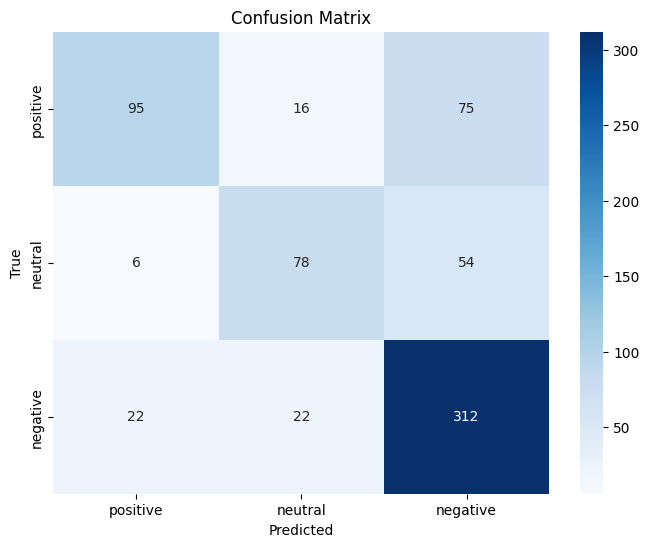

In [15]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
     

In [18]:
# Calculate F1-score
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.7027206722412445


In [19]:
# Save the CatBoost model
best_model.save_model(r'F:\Kabir\CSUN\R\catboost_model.dump')